### Inicializacion

In [1]:
import pandas as pd

dataset_raw=pd.read_csv("winequality_BDS.csv",sep=';')

dataset_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Moscatel,8.1,0.24,0.32,10.5,0.030,34.0,105.0,0.99407,3.11,0.42,11.8,6
1,Moscatel,5.8,0.23,0.20,2.0,0.043,39.0,154.0,0.99226,3.21,0.39,10.2,6
2,Moscatel,7.5,0.33,0.36,2.6,0.051,26.0,126.0,0.99097,3.32,0.53,12.7,6
3,Moscatel,6.6,0.38,0.36,9.2,0.061,42.0,214.0,0.99760,3.31,0.56,9.4,5
4,Moscatel,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.2,5


In [2]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


1.	type: tipo de uva con la que se elabora el vino.
2.	fixed acidity: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
3.	volatile acidity: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 
4.	citric acid: contenido de ácido cítrico en el vino, medido en gramos por litro.
5.	residual sugar: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro. 
6.	chlorides: concentración de cloruros (sales) en el vino, medida en gramos por litro.
7.	free sulfur dioxide: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 
8.	total sulfur dioxide: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
9.	density: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
10.	pH: medida de la acidez o alcalinidad del vino. 
11.	sulphates: concentración de sales de sulfato en el vino, medida en gramos por litro. 
12.	alcohol: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
13.	quality: puntuación del vino, con una escala que va de 0 a 10.


In [3]:
dataset_raw["type"].value_counts()

type
Moscatel    1632
Syrah       1599
Name: count, dtype: int64

### Analizamos los valores de cada columna y evaluamos en base al INV Argentina su validez (Analisis univariado).

Más adelente tomaremos decisiones sobre los valores de cada columna.

Analizamos la columna alcohol, ya que aparece como object, cuando en el head() vimos que había float:

In [4]:
for idx, val in dataset_raw["alcohol"].value_counts().sort_index().items():
    print(idx,val)

10 98
10.1 81
10.15 3
10.2 81
10.3 53
10.4 87
10.5 107
10.55 4
10.6 58
10.65 1
10.7 64
10.75 1
10.8 86
10.9 80
10.98 1
100.333.333.333.333 3
101.333.333.333.333 2
104.666.666.666.667 2
105.333.333.333.333 1
105.666.666.666.667 1
109.333.333.333.333 2
109.666.666.666.667 3
11 120
11.05 2
11.1 70
11.2 90
11.3 74
11.35 1
11.4 72
11.45 4
11.5 65
11.55 1
11.6 31
11.65 1
11.7 45
11.75 2
11.8 56
11.85 1
11.9 33
11.94 2
11.95 2
110.666.666.666.667 2
112.666.666.666.667 1
113.333.333.333.333 3
113.666.666.666.667 1
114.333.333.333.333 1
114.666.666.666.667 1
116.333.333.333.333 2
117.333.333.333.333 1
12 52
12.05 1
12.1 33
12.15 2
12.2 45
12.25 1
12.3 36
12.4 47
12.5 62
12.6 30
12.7 34
12.75 3
12.8 42
12.9 30
120.666.666.666.667 1
123.333.333.333.333 1
128.933.333.333.333 2
13 31
13.05 1
13.1 18
13.2 13
13.3 6
13.4 18
13.5 6
13.55 1
13.6 13
13.7 3
13.8 2
13.9 2
131.333.333.333.333 1
135.666.666.666.667 1
14 9
14.05 1
14.2 1
14.9 1
8.4 5
8.5 5
8.6 2
8.7 19
8.8 33
8.9 16
9 68
9.05 1
9.1 71
9.2 13

Vemos que hay valores que suponemos que son periodicos mal cargados.

Analizamos la columna fixed acidity.

In [5]:
for a,b in dataset_raw["fixed acidity"].value_counts().sort_index().items():
    print(a,b)

3.8 1
3.9 1
4.4 3
4.6 1
4.7 6
4.8 7
4.9 7
5.0 19
5.1 15
5.2 17
5.3 17
5.4 24
5.5 16
5.6 48
5.7 53
5.8 65
5.9 60
6.0 121
6.1 89
6.2 102
6.3 84
6.4 146
6.5 106
6.6 157
6.7 121
6.8 151
6.9 104
7.0 114
7.1 112
7.2 116
7.3 89
7.4 91
7.5 81
7.6 76
7.7 61
7.8 66
7.9 48
8.0 56
8.1 36
8.2 48
8.3 46
8.4 29
8.5 21
8.6 31
8.7 26
8.8 37
8.9 36
9.0 28
9.1 29
9.2 16
9.3 22
9.4 18
9.5 14
9.6 17
9.7 9
9.8 15
9.9 26
10.0 23
10.1 10
10.2 19
10.3 11
10.4 21
10.5 12
10.6 14
10.7 10
10.8 10
10.9 8
11.0 3
11.1 9
11.2 5
11.3 7
11.4 5
11.5 13
11.6 12
11.7 3
11.8 3
11.9 12
12.0 7
12.1 1
12.2 4
12.3 5
12.4 4
12.5 7
12.6 4
12.7 4
12.8 5
12.9 2
13.0 3
13.2 3
13.3 3
13.4 1
13.5 1
13.7 2
13.8 1
14.0 1
14.3 1
15.0 2
15.5 2
15.6 2
15.9 1


Siendo el valor minimo 3.8 y el máximo 15.9, no parece haber nulos o outliers.

Analizamos la columna volatile acidity.

In [6]:
dataset_raw["volatile acidity"].value_counts().sort_index()

volatile acidity
0.085     1
0.090     1
0.105     4
0.110     5
0.120    10
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: count, Length: 172, dtype: int64

Siendo el minimo 0.085 y el máximo 1.58 no parece haber nulos ni outliers.

Analizamos la columna citric acid.

In [8]:
for a,b in dataset_raw["citric acid"].value_counts().sort_index().items():
    print(a,b)

0.0 140
0.01 37
0.02 53
0.03 30
0.04 32
0.05 21
0.06 26
0.07 22
0.08 33
0.09 37
0.1 40
0.11 16
0.12 36
0.13 22
0.14 28
0.15 29
0.16 24
0.17 29
0.18 45
0.19 45
0.2 64
0.21 62
0.22 74
0.23 71
0.24 117
0.25 92
0.26 130
0.27 125
0.28 156
0.29 115
0.3 146
0.31 86
0.32 126
0.33 88
0.34 78
0.35 59
0.36 59
0.37 52
0.38 42
0.39 46
0.4 56
0.41 40
0.42 38
0.43 18
0.44 35
0.45 36
0.46 29
0.47 30
0.48 38
0.49 81
0.5 35
0.51 21
0.52 28
0.53 21
0.54 19
0.55 12
0.56 12
0.57 15
0.58 10
0.59 9
0.6 11
0.61 5
0.62 5
0.63 10
0.64 9
0.65 7
0.66 16
0.67 4
0.68 11
0.69 6
0.7 2
0.71 4
0.72 2
0.73 4
0.74 5
0.75 1
0.76 3
0.78 2
0.79 2
0.82 1
0.86 1
0.91 2
1.0 2


Se encontró que la máxima medida legal de gramos por litro de ácidos cítricos es 1g/l. Todos los valores tienen sentido y no hay ninuno nulo.

Analizamos la columna residual sugar.

In [9]:
for a,b in dataset_raw["residual sugar"].value_counts().sort_index().items():
    print(a,b)

0.7 2
0.8 5
0.9 16
1.0 29
1.1 53
1.15 1
1.2 75
1.3 58
1.4 87
1.45 1
1.5 65
1.6 96
1.65 3
1.7 96
1.75 3
1.8 155
1.85 3
1.9 139
2.0 187
2.05 2
2.1 140
2.15 2
2.2 147
2.25 1
2.3 122
2.35 2
2.4 104
2.5 103
2.55 1
2.6 94
2.65 1
2.7 48
2.8 63
2.85 1
2.9 38
2.95 1
3.0 31
3.1 13
3.15 1
3.2 24
3.3 19
3.4 19
3.45 1
3.5 19
3.6 13
3.65 1
3.7 11
3.75 1
3.8 14
3.85 3
3.9 18
3.95 1
4.0 20
4.1 10
4.2 19
4.25 3
4.3 15
4.35 1
4.4 11
4.5 15
4.6 18
4.65 2
4.7 10
4.75 1
4.8 18
4.9 10
5.0 17
5.1 16
5.15 1
5.2 10
5.25 2
5.3 3
5.35 2
5.4 10
5.5 10
5.55 1
5.6 14
5.7 14
5.8 15
5.9 7
6.0 11
6.1 17
6.2 13
6.3 15
6.4 13
6.5 7
6.55 3
6.6 12
6.65 3
6.7 5
6.8 13
6.9 6
6.95 1
7.0 5
7.1 10
7.2 15
7.25 2
7.3 7
7.4 16
7.5 5
7.6 9
7.7 9
7.75 1
7.8 15
7.9 21
7.95 1
8.0 14
8.1 11
8.15 1
8.2 16
8.3 16
8.4 7
8.5 7
8.6 11
8.7 4
8.8 13
8.9 10
9.0 12
9.1 5
9.15 2
9.2 8
9.3 2
9.4 3
9.5 4
9.55 1
9.6 4
9.65 3
9.7 9
9.8 6
9.85 2
9.9 11
10.0 2
10.05 1
10.1 3
10.2 7
10.3 5
10.4 9
10.5 8
10.6 6
10.7 10
10.8 8
10.9 2
11.0 5
11.1 4
11.2 

Siendo el mínimo 0.7 y el máximo 26.05 no parece haber nulos o outliers. Son valores normales ya que en vinos secos no pasa de 4 g/l, en vinos semi-secos entre 4 g/l y 12 g/l, en vinos semi-dulces entre 12 g/l y 45 g/l y en vinos dulces más de 45 g/l.

Analizamos la columna chlorides.

In [11]:
for a,b in dataset_raw["chlorides"].value_counts().sort_index().items():
    print(a,b)

0.009 1
0.012 2
0.013 1
0.014 2
0.015 4
0.016 1
0.017 3
0.018 4
0.019 1
0.02 6
0.021 6
0.022 7
0.023 9
0.024 8
0.025 7
0.026 19
0.027 18
0.028 24
0.029 26
0.03 37
0.031 35
0.032 52
0.033 43
0.034 52
0.035 59
0.036 81
0.037 52
0.038 52
0.039 45
0.04 54
0.041 59
0.042 61
0.043 43
0.044 74
0.045 41
0.046 55
0.047 63
0.048 80
0.049 50
0.05 71
0.051 48
0.052 48
0.053 49
0.054 46
0.055 27
0.056 35
0.057 40
0.058 29
0.059 29
0.06 34
0.061 16
0.062 32
0.063 26
0.064 26
0.065 24
0.066 37
0.067 27
0.068 34
0.069 28
0.07 37
0.071 48
0.072 24
0.073 35
0.074 56
0.075 46
0.076 55
0.077 47
0.078 51
0.079 43
0.08 66
0.081 40
0.082 46
0.083 35
0.084 50
0.085 27
0.086 34
0.087 27
0.088 33
0.089 25
0.09 22
0.091 19
0.092 22
0.093 21
0.094 22
0.095 24
0.096 21
0.097 19
0.098 15
0.099 8
0.1 13
0.101 5
0.102 10
0.103 7
0.104 16
0.105 7
0.106 8
0.107 9
0.108 2
0.109 3
0.11 10
0.111 7
0.112 6
0.113 1
0.114 11
0.115 5
0.116 2
0.117 7
0.118 9
0.119 3
0.12 4
0.121 2
0.122 7
0.123 6
0.124 3
0.125 1
0.126 1
0.127 

Siendo el mínimo 0.009 y el máximo 0.611 no parece haber nulos o outliers.

Analizamos la columna free sulfur dioxide.

In [12]:
for a,b in dataset_raw["free sulfur dioxide"].value_counts().sort_index().items():
    print(a,b)

1.0 3
2.0 2
3.0 51
4.0 43
5.0 110
5.5 1
6.0 150
7.0 79
8.0 63
9.0 67
10.0 94
11.0 71
12.0 90
13.0 76
14.0 67
15.0 98
16.0 85
17.0 92
18.0 78
19.0 69
20.0 70
21.0 79
22.0 56
23.0 72
23.5 1
24.0 75
25.0 70
26.0 81
27.0 63
28.0 60
28.5 1
29.0 79
30.0 52
31.0 69
32.0 62
33.0 54
34.0 60
35.0 55
36.0 59
37.0 35
37.5 2
38.0 36
39.0 31
40.0 39
40.5 1
41.0 43
42.0 35
43.0 23
43.5 1
44.0 23
45.0 45
46.0 18
47.0 33
48.0 22
49.0 22
50.0 21
51.0 22
51.5 1
52.0 29
52.5 2
53.0 20
54.0 22
55.0 19
56.0 11
57.0 9
58.0 7
59.0 13
59.5 2
60.0 13
60.5 2
61.0 19
61.5 1
62.0 8
63.0 11
64.0 3
65.0 7
66.0 7
67.0 4
68.0 17
69.0 10
70.0 2
70.5 1
71.0 1
72.0 2
73.0 2
74.0 1
75.0 2
79.0 1
79.5 4
81.0 3
87.0 2
97.0 1
98.0 3
101.0 2
105.0 2
108.0 3
112.0 1
124.0 1
289.0 1


Siendo el mínimo 1 y el máximo 289, se llegó a la conclusión que este último es un outlier (habiendo una diferencia de más de 160 mg/l con el valor anterior). 

Analizamos la columna total sulfur dioxide.

In [13]:
for a,b in dataset_raw["total sulfur dioxide"].value_counts().sort_index().items():
    print(a,b)

6.0 3
7.0 4
8.0 14
9.0 15
10.0 28
11.0 26
12.0 29
13.0 28
14.0 33
15.0 35
16.0 26
17.0 27
18.0 35
19.0 29
20.0 33
21.0 25
22.0 25
23.0 34
24.0 36
25.0 27
26.0 24
27.0 30
28.0 43
29.0 20
30.0 14
31.0 33
32.0 20
33.0 17
34.0 21
35.0 26
36.0 12
37.0 26
38.0 31
39.0 16
40.0 20
41.0 16
42.0 26
43.0 18
44.0 24
45.0 20
46.0 17
47.0 26
48.0 21
49.0 24
50.0 14
51.0 13
52.0 15
53.0 14
54.0 20
55.0 13
56.0 12
57.0 8
58.0 14
59.0 9
60.0 20
61.0 12
62.0 9
63.0 19
64.0 11
65.0 21
66.0 11
67.0 15
68.0 16
69.0 12
70.0 12
71.0 8
72.0 16
73.0 17
74.0 13
75.0 10
76.0 18
77.0 11
77.5 2
78.0 11
79.0 9
80.0 15
81.0 16
82.0 13
83.0 10
84.0 15
85.0 16
86.0 22
87.0 19
88.0 22
89.0 14
90.0 16
91.0 17
92.0 21
93.0 22
94.0 17
95.0 26
96.0 16
97.0 17
98.0 29
99.0 19
100.0 22
101.0 21
102.0 18
103.0 15
104.0 20
105.0 23
106.0 24
107.0 9
108.0 13
109.0 19
110.0 27
111.0 42
112.0 20
113.0 38
114.0 21
115.0 17
115.5 1
116.0 23
117.0 17
118.0 24
119.0 23
120.0 27
121.0 20
122.0 34
123.0 12
124.0 23
125.0 22
126.0 13
12

Guíandonos con el INV de Argentina vemos que el valor 440 de anhidrido sulfuroso total es muy superior al límite máximo aceptado (210mg/l). 
Previamente buscamos la Bodega del Sol y encontramos una posible coincidencia en España, por lo que indagamos sobre el valor máximo aceptado del anhidrido sulfuroso total en la Union Europea y aún así lo supera.

Entendiendo la relacion de esta columna con la anterior (esta es la suma de la anterior más otro valor), también se considera el 440 como outlier (suponiendo que surge del outlier 289 de la columna anterior).

Analizamos la columna density.

In [14]:
for a,b in dataset_raw["density"].value_counts().sort_index().items():
    print(a,b)

0.98711 1
0.98722 1
0.9874 1
0.98742 2
0.98746 2
0.98758 1
0.98774 1
0.98779 1
0.98794 2
0.98816 1
0.98819 1
0.98822 1
0.98823 1
0.988245 1
0.98834 1
0.98836 1
0.9884 1
0.98845 1
0.98853 1
0.98854 1
0.98856 2
0.9886 1
0.98862 3
0.98865 2
0.98867 2
0.98868 1
0.98869 1
0.9887 1
0.98871 1
0.98872 2
0.98878 1
0.98882 1
0.98884 1
0.98886 2
0.98889 3
0.9889 2
0.98892 1
0.98894 1
0.98895 2
0.98896 2
0.98898 1
0.989 3
0.98902 1
0.98904 1
0.9891 2
0.98912 3
0.98913 1
0.98914 4
0.98916 3
0.98918 4
0.9892 3
0.98922 1
0.98924 2
0.98926 4
0.98928 2
0.9893 2
0.989315 1
0.98934 4
0.98936 3
0.98938 1
0.98939 1
0.98941 1
0.98942 4
0.989435 1
0.98944 5
0.98945 1
0.98946 6
0.989465 1
0.98947 1
0.98948 2
0.98949 4
0.9895 5
0.98952 5
0.98953 3
0.98954 3
0.98956 2
0.98958 2
0.98959 3
0.9896 2
0.98961 4
0.98962 1
0.98963 6
0.98964 6
0.98966 3
0.98968 3
0.9897 3
0.98972 1
0.98974 1
0.98975 1
0.98976 1
0.98978 1
0.9898 6
0.98981 3
0.98984 3
0.98985 1
0.98986 2
0.98987 2
0.98988 2
0.9899 4
0.98993 1
0.98994 1
0

Los valores normales de densidad en el vino pueden ir desde 0.990 g/cm³ (para vinos secos) hasta alrededor de 1.020 g/cm³ (para vinos dulces), con el mosto antes de la fermentación alcanzando valores más altos debido a su contenido de azúcar.
Vemos que hay 75 filas que superan ampliamente el valor máximo (llegando a valores de +100).

Analizamos la columna pH.

In [16]:
for a,b in dataset_raw["pH"].value_counts().sort_index().items():
    print(a,b)

2.74 1
2.79 1
2.8 1
2.82 1
2.83 4
2.85 3
2.86 8
2.87 4
2.88 11
2.89 6
2.9 24
2.91 9
2.92 11
2.93 14
2.94 21
2.95 7
2.96 29
2.97 10
2.98 21
2.99 24
3.0 36
3.01 23
3.02 28
3.03 31
3.04 53
3.05 48
3.06 54
3.07 42
3.08 59
3.09 36
3.1 75
3.11 57
3.12 70
3.13 45
3.14 78
3.15 80
3.16 100
3.17 65
3.18 83
3.19 69
3.2 88
3.21 62
3.22 90
3.23 77
3.24 85
3.25 62
3.26 97
3.27 59
3.28 63
3.29 69
3.3 79
3.31 66
3.32 76
3.33 48
3.34 62
3.35 54
3.36 83
3.37 44
3.38 61
3.39 62
3.4 43
3.41 42
3.42 39
3.43 20
3.44 38
3.45 21
3.46 29
3.47 29
3.48 24
3.49 15
3.5 16
3.51 16
3.52 19
3.53 18
3.54 17
3.55 10
3.56 13
3.57 11
3.58 10
3.59 9
3.6 7
3.61 8
3.62 4
3.63 4
3.66 7
3.67 4
3.68 5
3.69 4
3.7 1
3.71 4
3.72 3
3.74 1
3.75 3
3.76 1
3.78 2
3.85 1
3.9 2
4.01 2


Siendo 2.74 el valor mínimo y el máximo 4.01, se asume que son válidos y no hay nulos o outliers.

In [17]:
for a,b in dataset_raw["sulphates"].value_counts().sort_index().items():
    print(a,b)

0.23 1
0.25 1
0.26 3
0.27 6
0.28 2
0.29 5
0.3 10
0.31 15
0.32 11
0.33 17
0.34 26
0.35 31
0.36 51
0.37 49
0.38 62
0.39 55
0.4 56
0.41 42
0.42 55
0.43 57
0.44 83
0.45 73
0.46 86
0.47 75
0.48 95
0.49 86
0.5 123
0.51 67
0.52 102
0.53 101
0.54 126
0.55 84
0.56 116
0.57 88
0.58 105
0.59 87
0.6 101
0.61 56
0.62 82
0.63 65
0.64 64
0.65 57
0.66 51
0.67 43
0.68 46
0.69 30
0.7 36
0.71 33
0.72 35
0.73 33
0.74 30
0.75 27
0.76 33
0.77 32
0.78 35
0.79 22
0.8 19
0.81 17
0.82 23
0.83 17
0.84 13
0.85 15
0.86 13
0.87 13
0.88 9
0.89 7
0.9 8
0.91 8
0.92 6
0.93 10
0.94 5
0.95 3
0.96 5
0.97 6
0.98 7
0.99 3
1.0 1
1.01 2
1.02 3
1.03 2
1.04 2
1.05 3
1.06 4
1.07 2
1.08 4
1.09 1
1.1 2
1.11 1
1.12 1
1.13 2
1.14 2
1.15 1
1.16 1
1.17 5
1.18 3
1.2 1
1.22 1
1.26 1
1.28 2
1.31 1
1.33 1
1.34 1
1.36 3
1.56 1
1.59 1
1.61 1
1.62 1
1.95 2
1.98 1
2.0 1


Siendo el mínimo 0.23 y el máximo 2.0 no parece haber nulos o outliers.

Analizamos la columna quality.

In [18]:
for a,b in dataset_raw["quality"].value_counts().sort_index().items():
    print(a,b)

3 14
4 92
5 1103
6 1453
7 501
8 68


Los valores son validos.

### Transformar los datos

Una vez vistos los valores de cada columna, decidimos transformar los tipos de columna a los correctos, eliminar aquellas muestras que tienen valores fuera de rango (en anhidrido sulfuroso libre y total) y aquellas muestras que suponemos que tienen datos que fueron mal cargados (en densidad y alcohol).

In [18]:
#Copiamos el dataset a uno que podamos transformar.
preprocessed_dataset=dataset_raw.copy()

La primer columna "type" indicada como objeto, es un string.

In [19]:
#Transformamos la columna type a tipo string.
preprocessed_dataset["type"]=preprocessed_dataset["type"].astype("string")

preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   string 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(1), string(1)
memory usage: 328.3+ KB


Una muestra se comporta como outlier para las columnas de total sulfur dioxide y free sulfur dioxide. Para mantener los análisis más fieles vamos a eliminar esa muestra. 

In [20]:
#Mantenemos solo las filas que no tengan "total sulfur dioxide" igual a 440.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["total sulfur dioxide"]!=440.0]

Para el caso donde suponemos que fueron datos mal cargados en alcohol (40) y densidad (75), eliminamos esas filas.

In [21]:
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset['alcohol'].astype(str).str.len() < 8]

In [33]:
#Tranformamos la columna de object a float64.
preprocessed_dataset["alcohol"]=preprocessed_dataset["alcohol"].astype("float64")

In [34]:
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["density"]<=1.020]

hasta aca oK

Con el objetivo de poder detectar mejor las correlaciones entre las variables, vamos a dividir el dataset por tipo. 

In [35]:
syrah_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Syrah"]
moscatel_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Moscatel"]

In [36]:
from ydata_profiling import ProfileReport

report1 = ProfileReport(syrah_dataset)
report2 = ProfileReport(moscatel_dataset)

# descargamos el reporte como archivo html
report1.to_file("syrah_profilereport.html")
report2.to_file("moscatel_profilereport.html")

c:\Users\usuario\Documents\Facultad\CsDatos\TPE - Hermida_Russo_Velis\venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\usuario\Documents\Facultad\CsDatos\TPE - Hermida_Russo_Velis\venv\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
preprocessed_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,7.414082,0.403802,0.288028,4.526339,0.066149,25.649335,88.349892,1.901500,3.235908,0.573680,10.634466,5.785825
std,1.598760,0.189421,0.156842,4.143991,0.041908,17.422288,54.633913,8.747779,0.164921,0.166353,1.211260,0.829374
min,3.800000,0.085000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987110,2.740000,0.230000,8.400000,3.000000
25%,6.400000,0.260000,0.200000,1.900000,0.042000,12.000000,38.000000,0.992550,3.120000,0.470000,9.515000,5.000000
50%,7.000000,0.360000,0.280000,2.500000,0.058000,23.000000,89.000000,0.995500,3.230000,0.550000,10.500000,6.000000
75%,8.000000,0.530000,0.370000,6.100000,0.080000,35.000000,127.000000,0.997230,3.340000,0.650000,11.400000,6.000000
max,15.900000,1.580000,1.000000,26.050000,0.611000,289.000000,440.000000,100.369000,4.010000,2.000000,14.900000,8.000000


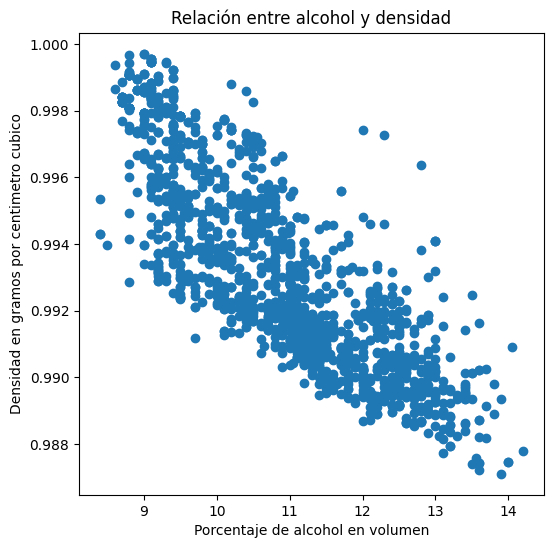

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(moscatel_dataset["alcohol"], moscatel_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Porcentaje de alcohol en volumen")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre alcohol y densidad")

# Mostrar el gráfico
plt.show()

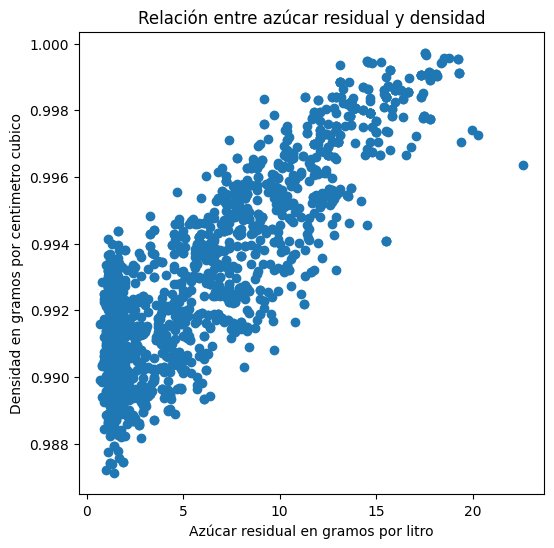

In [42]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(moscatel_dataset["residual sugar"], moscatel_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Azúcar residual en gramos por litro")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre azúcar residual y densidad")

# Mostrar el gráfico
plt.show()

In [40]:
moscatel_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1587 entries, 0 to 1631
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1587 non-null   string 
 1   fixed acidity         1587 non-null   float64
 2   volatile acidity      1587 non-null   float64
 3   citric acid           1587 non-null   float64
 4   residual sugar        1587 non-null   float64
 5   chlorides             1587 non-null   float64
 6   free sulfur dioxide   1587 non-null   float64
 7   total sulfur dioxide  1587 non-null   float64
 8   density               1587 non-null   float64
 9   pH                    1587 non-null   float64
 10  sulphates             1587 non-null   float64
 11  alcohol               1587 non-null   float64
 12  quality               1587 non-null   int64  
dtypes: float64(11), int64(1), string(1)
memory usage: 173.6 KB


In [31]:
for idx, val in moscatel_dataset["alcohol"].value_counts().sort_index().items():
    print(idx,val)

10 31
10.1 34
10.15 3
10.2 35
10.3 20
10.4 46
10.5 39
10.55 2
10.6 28
10.65 1
10.7 37
10.8 44
10.9 31
10.98 1
11 61
11.05 2
11.1 43
11.2 54
11.3 42
11.35 1
11.4 40
11.45 4
11.5 35
11.55 1
11.6 16
11.65 1
11.7 22
11.75 2
11.8 27
11.85 1
11.9 13
11.94 2
11.95 1
12 31
12.05 1
12.1 20
12.15 2
12.2 33
12.25 1
12.3 24
12.4 34
12.5 41
12.6 24
12.7 25
12.75 3
12.8 25
12.9 21
13 25
13.05 1
13.1 16
13.2 12
13.3 3
13.4 15
13.5 5
13.55 1
13.6 9
13.7 3
13.8 2
13.9 2
14 2
14.05 1
14.2 1
8.4 3
8.5 1
8.6 2
8.7 15
8.8 31
8.9 16
9 37
9.1 48
9.2 57
9.3 26
9.4 67
9.5 61
9.55 2
9.6 30
9.7 21
9.75 1
9.8 39
9.9 27


En el caso de citric acid, vemos que no hay una distribucion normal, aun así la comparacion entre la mediana y la media nos estaría indicando lo contrario ya que son prácticamente iguales. Como la media es sensible a valores extremos, y considerando a 1 como valor extremo, y hay gran cantidad de ceros esto provoca que tome un valor más cercano a cero.

Chlorides tiene la cola pesada, la Kurtosis da 41. Esto se da por la presencia de un valor extremo. Vemos que está sesgada a derecha.

Hipotesis: Hay un vino, el que tiene valores altos de azufre, que también tiene valores altos en el resto de columnas. Provocando que casi todas las graficas esten sesgadas a derecha. 

Segun una fuente, los valores normales de densidad en el vino pueden ir desde 0.990 g/cm³ (para vinos secos) hasta alrededor de 1.020 g/cm³ (para vinos dulces), con el mosto antes de la fermentación alcanzando valores más altos debido a su contenido de azúcar.
Vemos que hay 75 filas que superan ampliamente el valor máximo (llegando a valores de +100). Al representar tan solo un 2% de las muestras totales, decidimos descartarlas.